In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
print("Num of GPUs Available: " , len(tf.config.experimental.list_physical_devices('GPU')))

%matplotlib inline

Num of GPUs Available:  1


In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [4]:
#輸入格式整理
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

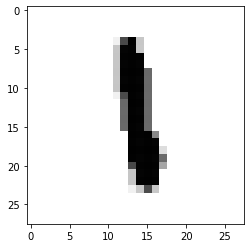

In [5]:
plt.imshow(x_train[200], cmap = 'Greys')

In [5]:
#輸出格式整理
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [7]:
y_train[200]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [6]:
#CNN model
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [9]:
model.add(Conv2D(64, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [10]:
model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [11]:
#再送入一個標準的神經網路
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [12]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
#組裝
model.compile(loss = 'mse', optimizer = SGD(lr = 0.05), metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

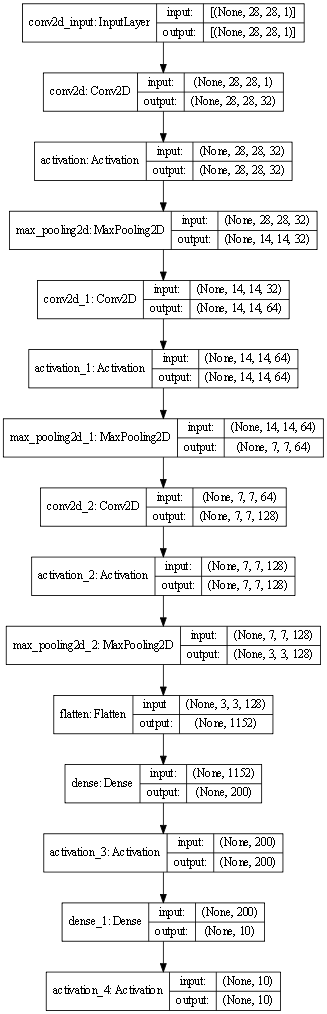

In [17]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, dpi=60)

In [15]:
#model training
model.fit(x_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 26s 436us/step - loss: 0.0444 - accuracy: 0.7376s
Epoch 2/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0054 - accuracy: 0.9642
Epoch 3/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0037 - accuracy: 0.9758s - loss: 0.0037 - accuracy: 0.97
Epoch 4/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0028 - accuracy: 0.9823
Epoch 5/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0024 - accuracy: 0.9848
Epoch 6/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0020 - accuracy: 0.9878s - loss: 0.002
Epoch 7/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0016 - accuracy: 0.9900 1s - loss: 0.0017 - accuracy: 0.99 - ETA: 
Epoch 8/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0015 - accuracy: 0.9914
Epoch 9/10
60000/60000 [============================

In [16]:
#model testing
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 170us/step


In [17]:
print("Loss = ", score[0])
print("Acc = ", score[1])

Loss =  0.0024070196120402417
Acc =  0.984499990940094


In [18]:
predict = model.predict_classes(x_test)

100
Model prediction :  6


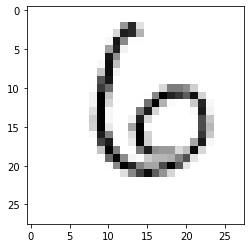

In [20]:
test_num = int(input())
def test(test_num):
    plt.imshow(x_test.reshape(10000,28,28)[test_num], cmap = 'Greys')
    print("Model prediction : ", predict[test_num])
    
test(test_num)

In [31]:
x_test.shape

(10000, 28, 28, 1)

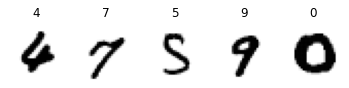

In [32]:
import numpy as np
pick = np.random.randint(1,9999,5)

for i in range(len(pick)):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]], cmap = 'Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")

In [33]:
#save model
myCNNmodel_1 = model.to_json()
open("myCNNmodel_1.json", "w").write(myCNNmodel_1)
model.save_weights("myCNNmodel_1_weights.h5")

In [34]:
#load model
from keras.models import model_from_json
model2 = model_from_json(open("myCNNmodel_1.json").read())
model2.load_weights("myCNNmodel_1_weights.h5")
model2.compile(loss = "mse", optimizer = SGD(lr = 0.05))

In [35]:
score2 = model2.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 125us/step


In [36]:
print("Loss = ", score[0])
print("Acc = ", score[1])
#same

Loss =  0.0024070196120402417
Acc =  0.984499990940094
